In [1]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import scipy as sp
import pandas as pd
import util

20172019
20172019


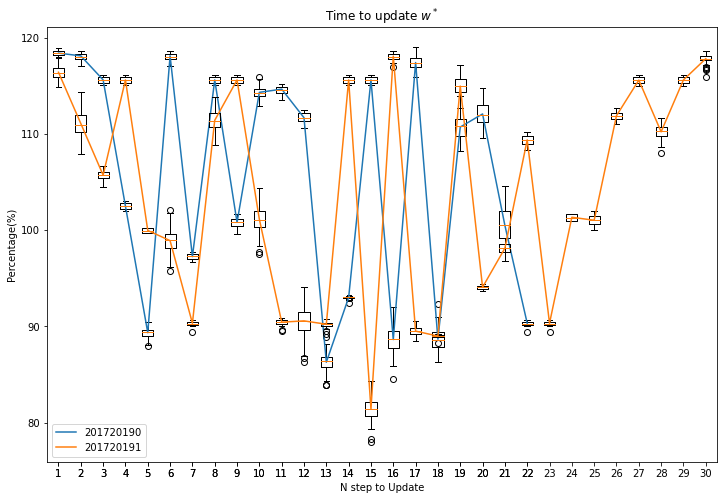

In [68]:
fig = plt.figure(figsize=(12,8))
p = []
counter = 0
for file in ['2017-10-29_2019-10-29_a2c_results_year_error.csv', '2017-10-29_2019-10-29_a2c_results.csv']:
    df = pd.read_csv(file)
    Returns = []
    means = []
    for group,data in df.groupby('model'):
        Returns.append(data['return'] - data['cost'])
        means.append(np.mean(data['return'] - data['cost']))

    plt.title(r'Time to update $w^*$')
    plt.xlabel("N step to Update")
    plt.ylabel("Percentage(%)")
    boxpt = plt.boxplot(Returns)
    print(file[:4]+file[11:15])
    # line, = plt.plot(range(1, len(means)+1), means, label=file[:4]+file[11:15])
    line, = plt.plot(range(1, len(means)+1), means, label=file[:4]+file[11:15]+f'{counter}')
    p.append(line)
    counter += 1
plt.legend(handles = p)
plt.savefig('n_step.png')



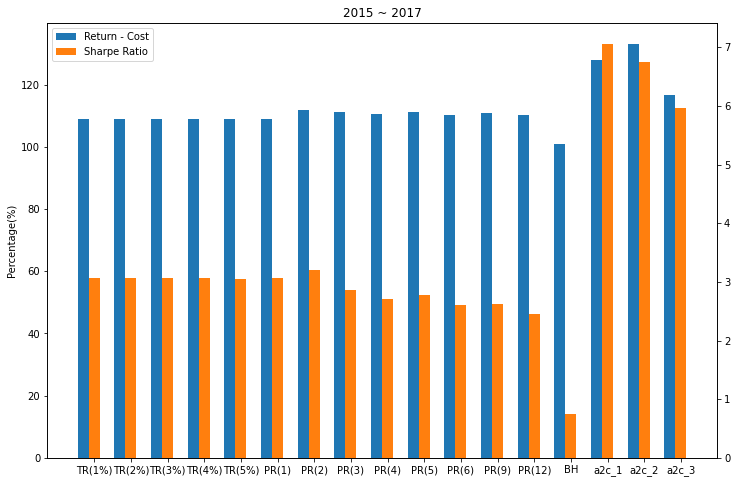

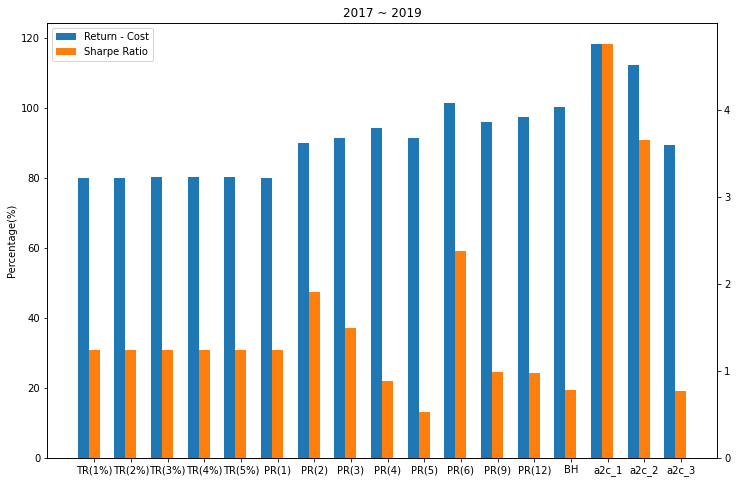

In [65]:
for file in ['2015-10-29_2017-10-29_results.csv', '2017-10-29_2019-10-29_results.csv']:
    df = pd.read_csv(file)
    fig, ax1 = plt.subplots(figsize=(12,8))
    plt.title(f"{file[:4]} ~ {file[11:15]}")
    plt.ylabel('Percentage(%)')
    left = np.arange(1, len(df)+1)
    label = df.model
    h1 = ax1.bar(left-0.3, df['return']-df['cost'], width=0.3, tick_label=label,align='center',color='tab:blue', label='123')
    ax2 = ax1.twinx()
    h2 = ax2.bar(left, df['sharpe']*100, width=0.3, tick_label=label,align='center', color='tab:orange')
    plt.legend([h1, h2], ['Return - Cost', "Sharpe Ratio"])
    plt.savefig(f'{file[:4]+file[11:15]}.png')






In [60]:
df = pd.read_csv("data/1990_2019_daily_data.csv", index_col='Dates')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

alpha = 1
targets = []
def utility(weights):
    return -weights.T@mean + 0.5 * alpha * weights.T @ cov @ weights
for idx, tick in enumerate(df.iloc[500:].iterrows()):

    past500 = df.iloc[idx:idx+500].to_numpy()
    growth = util.daily_growth(past500)
    mean = np.mean(growth, axis=0)*256
    cov = np.cov(growth.T)*256
    x0 = np.ones(4) / 4
    cons = ({'type': 'eq', 'fun': lambda x: x.sum() - 1.0})
    bnds = [(0, 1)] * 4
    target_ratio = sp.optimize.minimize(utility, x0, method='SLSQP', bounds=bnds, constraints=cons)['x']
    targets.append(target_ratio)

KeyboardInterrupt: 

In [108]:
targets = np.array(targets)
new_df = df.iloc[500:]
new_df[['tg1', 'tg2', 'tg3', 'tg4']] = targets
new_df.to_csv("data/1992_2019_daily_data_with_target.csv")
targets = new_df[['tg1', 'tg2', 'tg3', 'tg4']].to_numpy()
covs = []
means = []
for idx, tick in enumerate(df.iloc[500:].iterrows()):

    past500 = df.iloc[idx:idx+500].to_numpy()
    growth = util.daily_growth(past500)
    mean = np.mean(growth, axis=0)*256
    cov = np.cov(growth.T)*256
    covs.append(cov)
    means.append(mean)
means = np.array(means)
covs = np.array(covs)
np.save('data/means.npy', means)
np.save('data/cov.npy', covs)

In [1]:
for i in range(1996, 2020):
    for j in
    print(i)

1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
